Load the image of Dog.jpg

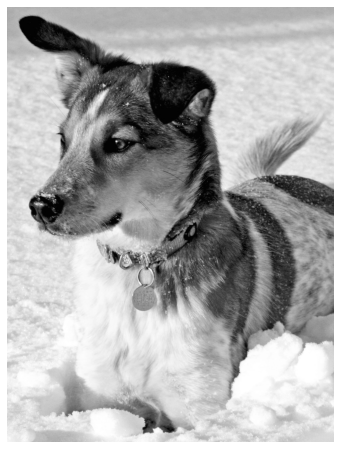

In [1]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
import os
plt.rcParams['figure.figsize'] = [16, 8]


A = imread(os.path.join('dog.jpg'))
X = np.mean(A, -1); # Convert RGB to grayscale

img = plt.imshow(X)
img.set_cmap('gray')
plt.axis('off')
plt.show()

Compute the full SVD

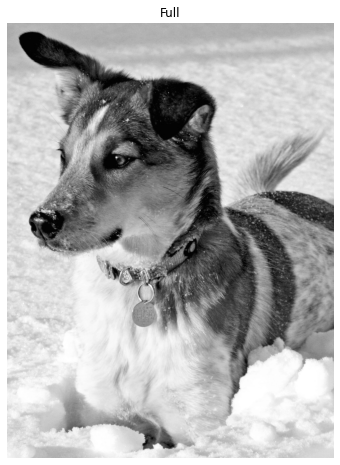

In [33]:
U, S, VT = np.linalg.svd(X,full_matrices=True)
S = np.diag(S)

m, n = X.shape
X_reconstructed = U[:,:n] @ S @ VT[:m,:]

j=0
plt.figure(j+1)
j += 1
img = plt.imshow(X_reconstructed)
img.set_cmap('gray')
plt.axis('off')
plt.title('Full')
plt.show()

Choose rank 10, confirm U*U is the 10x10 identity matrix

note: due to the nature of numpy precision, most of the time we get an very small number that is indisinguishable to 0 by the computer... in this case  number to the 10^-16 or 10^-17 power. If we treat these small values as 0 below we do in fact have the identity matrix.

In [36]:
U[:,:10].T.conj() @ U[:,:10]

array([[ 1.00000000e+00,  2.08166817e-17,  3.33066907e-16,
         2.35922393e-16,  1.93421668e-16, -1.11022302e-16,
         1.28369537e-16,  1.73472348e-17,  2.08166817e-16,
        -1.38777878e-17],
       [ 2.08166817e-17,  1.00000000e+00, -2.96637714e-16,
        -3.08780779e-16, -1.73472348e-17, -8.84708973e-17,
         6.24500451e-17,  2.18575158e-16, -1.14491749e-16,
         2.35922393e-16],
       [ 3.33066907e-16, -2.96637714e-16,  1.00000000e+00,
         5.55111512e-17,  1.04083409e-16, -1.17961196e-16,
        -7.63278329e-17,  7.93635990e-17,  2.08166817e-17,
         2.77555756e-17],
       [ 2.35922393e-16, -3.08780779e-16,  5.55111512e-17,
         1.00000000e+00,  4.09394740e-16, -5.55111512e-17,
         8.63024929e-17,  1.17961196e-16,  1.45716772e-16,
        -1.04083409e-16],
       [ 1.93421668e-16, -1.73472348e-17,  1.04083409e-16,
         4.09394740e-16,  1.00000000e+00,  1.70002901e-16,
        -4.85722573e-17, -4.51028104e-17, -9.02056208e-17,
         1.

Show UU* is not the 10x10 identity matrix

In [37]:
U[:,:10] @ U[:,:10].T.conj()

array([[0.0012137 , 0.0011962 , 0.00119143, ..., 0.00137621, 0.00137166,
        0.00137153],
       [0.0011962 , 0.00117995, 0.00117587, ..., 0.00135342, 0.00134873,
        0.00134812],
       [0.00119143, 0.00117587, 0.00117313, ..., 0.00133391, 0.00132841,
        0.00132737],
       ...,
       [0.00137621, 0.00135342, 0.00133391, ..., 0.00232884, 0.00234809,
        0.00235687],
       [0.00137166, 0.00134873, 0.00132841, ..., 0.00234809, 0.00236977,
        0.00238011],
       [0.00137153, 0.00134812, 0.00132737, ..., 0.00235687, 0.00238011,
        0.00239233]])

Compute norm of error between U*U and and the nxn identity matrix as the rank r varies from 1 to n and plot the error:

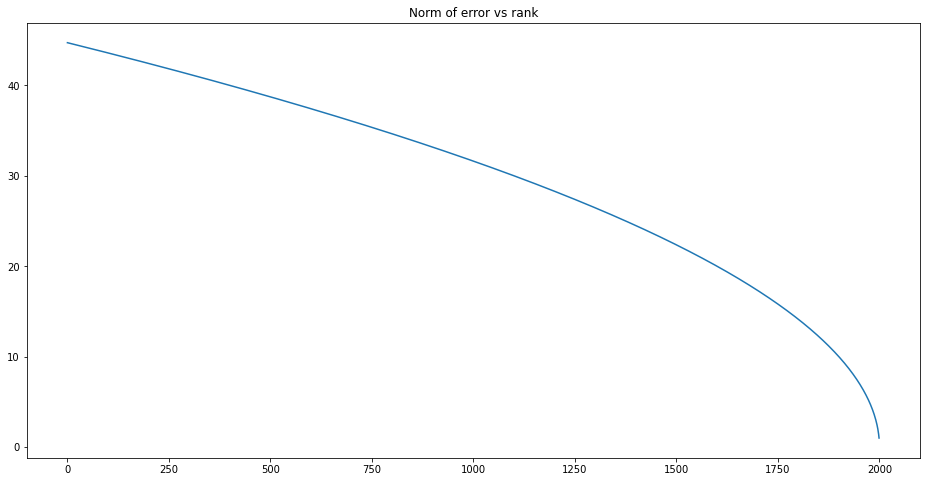

In [50]:
x_points = []
y_points = []
for x in range(m):
  x_points.append(x)
  y_points.append(np.linalg.norm((U[:,:x] @ U[:,:x].T.conj()) - np.identity(m)))


plt.plot(np.array(x_points), np.array(y_points))
plt.title("Norm of error vs rank")
plt.show()